# This notebook compares the effect of different strategies to reduce background expression and increase the dynamic range

In [1]:
#Import/Initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #plotting
from importlib import reload
import sys

sys.path.append("models/")

%matplotlib inline

#Define our color pallette
colors = {'Orange': '#fba649', "Turquoise": '#45c4af', "Red": '#ec6c5f', "Green": '#4D8B31', "Purple": '#641877'}

In [3]:
# 'Normal' lactate biosensor
import Lactatemodel_succinate_p3
reload(Lactatemodel_succinate_p3)
from Lactatemodel_succinate_p3 import Lactate_model_succinate_p3

model = Lactate_model_succinate_p3()

# CRISPRi/asRNA lactate biosensor
import Bassystem_final
reload(Bassystem_final)
from Bassystem_final import Bassystem

model2 = Bassystem()

#Models that are used to improve background production
#Feed-forward network (GFP under lactate promoter)
import Bassystem_GFP_pALPAGA
reload(Bassystem_GFP_pALPAGA)
from Bassystem_GFP_pALPAGA import Bassystem_FFN

model3 = Bassystem_FFN()

#sRNA leak dampener switch
import Bassystem_GFP_pALPAGA_sRNA
reload(Bassystem_GFP_pALPAGA_sRNA)
from Bassystem_GFP_pALPAGA_sRNA import Bassystem_sRNA

model4 = Bassystem_sRNA()

#Define concentration range to simulate
concentrations = np.logspace(-1.5,1.5,100)

#Simulate each models dose-response and calculate the EC5, EC50, EC95
ec1, ec_response1, responses1, _simulations1 = model.evaluate_dose_response(model.params, concentrations)
ec2, ec_response2, responses2, _simulations2 = model2.evaluate_dose_response(model2.params, concentrations)
ec3, ec_response3, responses3, _simulations3 = model3.evaluate_dose_response(model3.params, concentrations)
ec4, ec_response4, responses4, _simulations4 = model4.evaluate_dose_response(model4.params, concentrations)

#Print EC5, EC50, EC95
print(f"Without asRNA system: Predicted EC values: EC5:{np.round(ec1[0],4)}, EC50:{np.round(ec1[1],4)}, EC95:{np.round(ec1[2],4)}")
print(f"With asRNA system: Predicted EC values: EC5:{np.round(ec2[0],4)}, EC50:{np.round(ec2[1],4)}, EC95:{np.round(ec2[2],4)}")
print(f"With FFN: Predicted EC values: EC5:{np.round(ec3[0],4)}, EC50:{np.round(ec3[1],4)}, EC95:{np.round(ec3[2],4)}")
print(f"With sRNA leak dampener swicth: Predicted EC values: EC5:{np.round(ec4[0],4)}, EC50:{np.round(ec4[1],4)}, EC95:{np.round(ec4[2],4)}")

Model initiated!
index 0: k_b_p3
index 1: k_b_p11
index 2: k_op_succ
index 3: k_pt_lldr
index 4: k_pt_gfp
index 5: k_f_lldrcomplex
index 6: k_d_lldrmRNA
index 7: k_d_lldr
index 8: k_d_lldrcomplex
index 9: k_d_gfpmRNA
index 10: k_d_gfp
index 11: alpaga_basal
index 12: alpaga_act1
index 13: alpaga_act2
index 14: alpaga_k3
index 15: alpaga_k_act1
index 16: alpaga_k_act2
index 17: copy_nr
index 18: mumax
index 19: tc
index 20: cap
index 21: sigma
index 22: gamma
index 23: scale
Model initiated!
Model initiated!
Model initiated!
Without asRNA system: Predicted EC values: EC5:0.4176, EC50:1.8571, EC95:7.6904
With asRNA system: Predicted EC values: EC5:0.4894, EC50:1.7255, EC95:5.104
With FFN: Predicted EC values: EC5:0.6124, EC50:2.1802, EC95:7.8294
With sRNA leak dampener swicth: Predicted EC values: EC5:1.1102, EC50:3.3713, EC95:11.6817


In [5]:
#Calculate and print the dynamic ranges
print("Dynamic range:")
max1 = max(responses1)/max(responses1)
min1 = min(responses1)/max(responses1)
print(f"Without asRNA system: {np.round(min1,4)}-{np.round(max1,4)}, a fold change of {np.round((max1-min1)/min1,4)}")

max2 = max(responses2)/max(responses2)
min2 = min(responses2)/max(responses2)
      
print(f"With asRNA system: {np.round(min2,4)}-{np.round(max2,4)}, a fold change of {np.round((max2-min2)/min2,4)}")

max3 = max(responses3)/max(responses3)
min3 = min(responses3)/max(responses3)
      
print(f"With FFN: {np.round(min3,4)}-{np.round(max3,4)}, a fold change of {np.round((max3-min3)/min3,4)}")

max4 = max(responses4)/max(responses4)
min4 = min(responses4)/max(responses4)
      
print(f"With sRNA leak dampener switch: {np.round(min4,4)}-{np.round(max4,4)}, a fold change of {np.round((max4-min4)/min4,4)}")

print("Maximum was normalized to 1, since the fluorescence outputs cannot be compared directly")

Dynamic range:
Without asRNA system: 0.4054-1.0, a fold change of 1.4664
With asRNA system: 0.4567-1.0, a fold change of 1.1898
With FFN: 0.1624-1.0, a fold change of 5.1559
With sRNA leak dampener switch: 0.0265-1.0, a fold change of 36.7003
Maximum was normalized to 1, since the fluorescence outputs cannot be compared directly


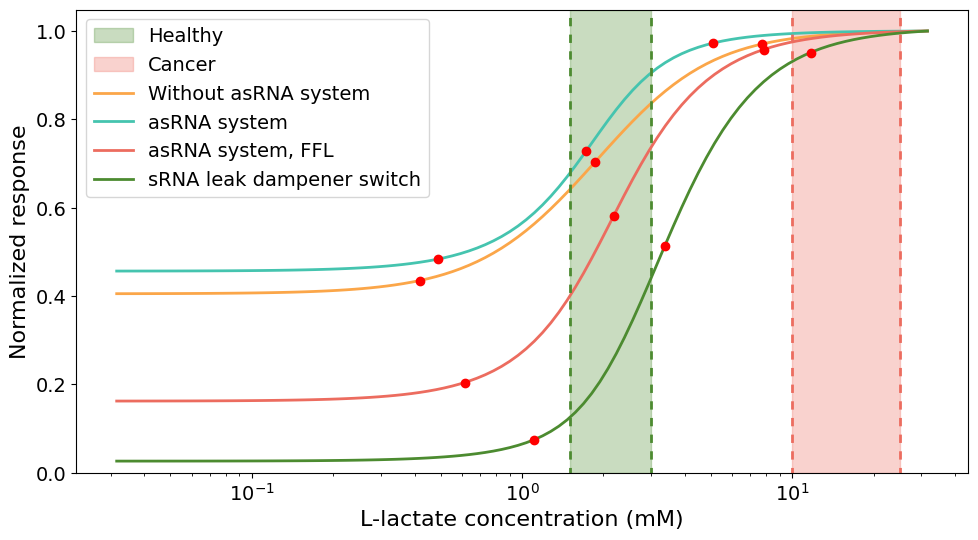

In [6]:
#Custom color cycle
from cycler import cycler
color_list = np.array([np.array([251,166,73], dtype='int'),np.array([69,196,175], dtype='int'),np.array([236,108,95], dtype='int'),
                       np.array([76,139,48], dtype='int'),np.array([100,25,120], dtype='int'),np.array([221,204,119], dtype='int'),
                       np.array([204,121,167], dtype='int')])/255

custom_cycler = (cycler(color=color_list, linewidth=np.ones(len(color_list))))

#Define standard text sizes
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Bar plot parameters
BAR_WIDTH = 0.30
SPACING = 0.05
CAP_SIZE = 5
SCALE = 2

dashline = (1, (3, 3))
fig, ax = plt.subplots(figsize=(10,5.625), tight_layout=True)

ax.set_prop_cycle(custom_cycler)
plt.axvspan(1.5,3, color=colors['Green'], alpha=0.3, label='Healthy')
plt.axvspan(10,25, color=colors['Red'], alpha=0.3, label='Cancer')

plt.plot(concentrations, responses1/max(responses1), label="Without asRNA system", linewidth=2)
plt.plot(concentrations, responses2/max(responses2), label="asRNA system", linewidth=2)
#plt.plot([ec1,ec2],[ec_response1/max(responses1),ec_response2/max(responses2)], 'or', ms=5)


plt.plot(concentrations, responses3/max(responses3), label="asRNA system, FFL", linewidth=2)
plt.plot(concentrations, responses4/max(responses4), label="sRNA leak dampener switch", linewidth=2)

plt.plot([ec1,ec2,ec3,ec4],[ec_response1/max(responses1),ec_response2/max(responses2),ec_response3/max(responses3),ec_response4/max(responses4)], 'or', zorder=10)

#plt.plot(model.concentrations, model.dose_response/max(model.dose_response), label='Data')
plt.axvline(1.5,ymin =0, ymax=1, color=colors['Green'], linestyle=dashline, linewidth=2)
plt.axvline(3,ymin =0, ymax=1, color=colors['Green'], linestyle=dashline, linewidth=2)
plt.axvline(10,ymin =0, ymax=1, color=colors['Red'], linestyle=dashline, linewidth=2)
plt.axvline(25,ymin =0, ymax=1, color=colors['Red'], linestyle=dashline, linewidth=2)
plt.xlabel('L-lactate concentration (mM)')
plt.ylabel('Normalized response')
plt.xscale('log')
plt.ylim(ymin=0)
plt.legend(loc="best")
plt.savefig("figures/systems_comparison_DL.svg")
plt.show()